In [800]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
def geno_to_pheno(individuals):
  return [int("".join(map(str, individual)), 2) for individual in individuals]

def pheno_to_geno(x_values):
  return [[int(bit) for bit in format(x_value, '06b')] for x_value in x_values]

GENOTYPE_LENGT = 6

def initialize_population(population_size: int) -> list[list]:
  """
  Creates the individuals for the population, each having six binary genes. Provides outputs
  e.g., as a list of lists e.g.,
  """
  return_list = []
  for _ in range(population_size):
    individual_list = []
    for _ in range(GENOTYPE_LENGT):
      individual_list.append(random.choice([1,0]))
    return_list.append(individual_list)
  
  return return_list

def calculate_fitness(individuals, pheno_mode=False):
  """
  Takes in the phenotype and calculates the fitness
  
  fitness = − 0.00008333y^6 − 0.001y^5 + 0.09375y^4 + 1.16667y^3 − 19.53125y^2 − 234.375^y + 8350
  """
  if pheno_mode: # makes it so that individual phenos can be directly put into the function
     pheno = individuals
  else:
    pheno = geno_to_pheno(individuals)
  
  fitness_list = []
  
  for y in pheno:
    if y >= 32:
      y -= 64
    fitness_list.append(-0.00008333*(y**6) - 0.001*(y**5) + 0.09375*(y**4) + 1.16667*(y**3) - 19.53125*(y**2) - 234.375*y + 8350)
  
  return fitness_list

def parent_selection(individuals, fitness_values):
    """
    Inputs: Individuals, Fitness values; 
    Output: Parents (in random order, same number as individuals)). 
    This separate function parent selection should perform fitness-proportional parent
    selection (as discussed in class) so that more fit parents have a higher
    probability to be selected.
    """
    amount = len(individuals)

    #TODO: this might be a flawed way of calculating the probabilities
    total_fitness = sum(fitness_values)
    fitness_probabilities = [fitness/total_fitness for fitness in fitness_values]
    individual_indices = range(0,amount)

    parent_pool = []
    while(len(parent_pool) < amount-1):
      couple = np.random.choice(individual_indices, size=2, replace=False, p=fitness_probabilities)
      for parent_index in couple:
        parent_pool.append(individuals[parent_index])
    
    return parent_pool

def one_point_crossover(parents, crossover_probability):
    """
    Inputs: Parents, Crossover Probability 
    Outputs: Offspring (pre-Mutation)). 
    This separate function one point crossover performs 1-point crossover and generates 
    for parents 1 & 2, parents 3 & 4 etc. offspring (and e.g., provides all offspring as 
    a list of lists). Keep in mind that you can use a random uniform number ∈ [0, 1] 
    and compare it against the crossover probability, if it does not exceed it, crossover 
    is performed (with a random cutoff point, using randint function in random module), 
    otherwise, the two parents are simply copied to be the offspring.
    """
    amount_of_parents = len(parents)

    children_list = []

    for index in range(1,amount_of_parents,2):
      parent1 = parents[index - 1]
      parent2 = parents[index]

      should_crossover =  random.uniform(0, 1) <= crossover_probability

      if should_crossover:
        crossover_point = random.randint(1, len(parent1))
        
        offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
        offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
        
      else:
        offspring1 = parent1.copy()
        offspring2 = parent2.copy()
          

      children_list.append(offspring1)
      children_list.append(offspring2)

    return children_list

def mutation(individuals,mutation_probability):
    """
    Inputs: Individuals, Mutation Probability PM
    Outputs: Offspring (mutated)). 
    This separate function mutation performs bitflip mutation for 
    each bit / gene and each individual with mutation probability 
    PM . Similarly to crossover, keep in mind that you can use a 
    random uniform number ∈ [0, 1] and compare it against the mutation
    probability, if it does not exceed it, the value for the gene is
    flipped (e.g., from 0 to 1 or vice versa).
    """
    mutated_individuals = []

    for individual in individuals:
        mutated_individual = individual.copy()

        for gene_index in range(len(mutated_individual)):
            if random.random() <= mutation_probability:
                mutated_individual[gene_index] = 1 - mutated_individual[gene_index]

        mutated_individuals.append(mutated_individual)

    return mutated_individuals

def survivor_selection(individuals, offsprint, fitness_individuals, fitness_offspring):
    """
    Inputs: Individuals, Offspring, Fitness Individuals, Fitness Offspring; 
    Outputs: (New) population. 
    This separate function survivor selection performs deterministic 
    survivor selection (no randomness / stochasticity here) by taking 
    from among the population individuals and the offspring the survivors 
    based on the highest fitness values (population size should remain the same!.
    """
    pass

def loop(no_of_iterations):
    """
    Now create the complete version of the simple genetic algorithm
    (SGA), using the functions previously coded. Specifically, initialize the
    population and then loop (for a number of iterations to be specified) over
    those steps that should be repeated in the SGA.
    """
    pass

# Task 1:

## 1.1 Initialization function

Here are the generated individuals.

In [802]:
SIZE = 4

task_1_population = initialize_population(SIZE)

print("The return type is a list of lists.")

for individual_no in range(SIZE):
  print(f"Individual {individual_no}: {task_1_population[individual_no]}")

The return type is a list of lists.
Individual 0: [0, 0, 1, 1, 1, 0]
Individual 1: [0, 1, 1, 0, 0, 1]
Individual 2: [1, 0, 0, 0, 1, 1]
Individual 3: [0, 0, 0, 1, 0, 1]


## 1.2 Calculate fitness

Here is the fitness for the individual: [0,1,0,1,0,1]

In [803]:
print(calculate_fitness([[0,1,0,1,0,1]]))

[12620.976507070001]


Here is the plotted fitness landscape:

[8350.0, 8097.35308667, 7813.92102688, 7509.88384243, 7197.30156032, 6889.84421875, 6602.46187552, 6350.99461883, 6151.72258048, 6020.85595147, 5973.965, 6025.35009187, 6187.351713280001, 6469.60049603, 6878.20724512, 7414.89296875, 8076.058910719999, 8851.79658523, 9724.837814080001, 10669.44476627, 11650.240000000002, 12620.976507070001, 13523.247759679998, 14285.13775963, 14819.811089920004, 15024.04296875, 14776.689305920001, 13937.09676163, 12343.452807679998, 9811.075791069994, 6130.644999999997, 1066.3707322699993, 4.083246079993842, 3343.3907922699946, 5792.9649999999965, 7519.294531069998, 8667.709127679998, 9364.029541629996, 9716.157465919998, 9815.60546875, 9738.966929919998, 9549.325979629999, 9297.60743968, 9023.86676707, 8758.52, 8523.513706270001, 8333.43493408, 8196.56116523, 8115.85027072, 8089.870468749999, 8113.67028512, 8179.58851603, 8278.00419328, 8398.02655187, 8528.125, 8656.69909147, 8772.58850048, 8865.52299883, 8926.51243552, 8948.17671875, 8925.01580032, 88

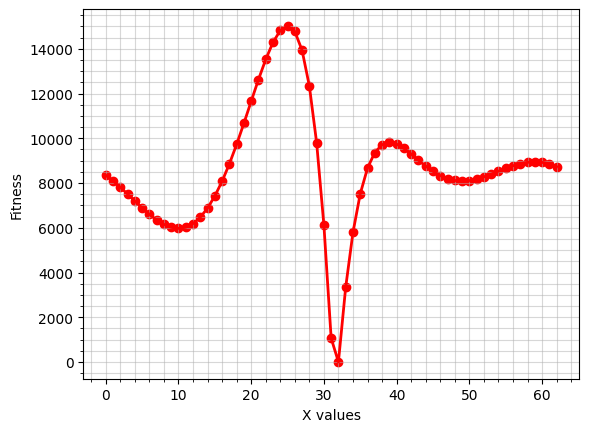

In [804]:
x_list = range(0,63)
y_list = calculate_fitness(x_list,pheno_mode=True)

print(y_list)

plt.plot(x_list, y_list, "r-", linewidth=2, label="Fitness")
plt.scatter(x_list, y_list, color="red")
plt.xlabel("X values")
plt.ylabel("Fitness")
plt.grid(True, alpha=0.5, which="both")
plt.minorticks_on()
plt.show()

The minimum is reached at x-value 32. The maximum is reached at 25.

## 1.3 Parent Selection Function


In [805]:
MAXIMA = [0,1,1,0,0,1] # 25
MINIMA = [1,0,0,0,0,0] # 32
MODERATE1 = [0,0,0,0,1,0] # 2
MODERATE2 = [1,0,1,0,0,0] # 40
task_3_population = [MAXIMA,MINIMA,MODERATE1,MODERATE2]
task_3_population_fitness = calculate_fitness(task_3_population)
print("Individuals:")
for individual_index in range(4):
    print(
        f"  Individual {individual_index}:\n        Geno: {task_3_population[individual_index]}\n        Fitness: {task_3_population_fitness[individual_index]}"
    )
task_3_parents = parent_selection(task_3_population, task_3_population_fitness)
task_3_parents_fitness = calculate_fitness(task_3_parents)

print("\nParents selected:")
for individual_index in range(4):
    print(
        f"  Parent {individual_index}:\n        Geno: {task_3_parents[individual_index]}\n        Fitness: {task_3_parents_fitness[individual_index]}"
    )

Individuals:
  Individual 0:
        Geno: [0, 1, 1, 0, 0, 1]
        Fitness: 15024.04296875
  Individual 1:
        Geno: [1, 0, 0, 0, 0, 0]
        Fitness: 4.083246079993842
  Individual 2:
        Geno: [0, 0, 0, 0, 1, 0]
        Fitness: 7813.92102688
  Individual 3:
        Geno: [1, 0, 1, 0, 0, 0]
        Fitness: 9738.966929919998

Parents selected:
  Parent 0:
        Geno: [0, 0, 0, 0, 1, 0]
        Fitness: 7813.92102688
  Parent 1:
        Geno: [0, 1, 1, 0, 0, 1]
        Fitness: 15024.04296875
  Parent 2:
        Geno: [0, 1, 1, 0, 0, 1]
        Fitness: 15024.04296875
  Parent 3:
        Geno: [1, 0, 1, 0, 0, 0]
        Fitness: 9738.966929919998


As we can see the individual with the fitness minima was not selected.

## 1.4 Recombination

In [806]:
random.seed(45)

task_4_parent1 = [1,1,1,1,1,1]
task_4_parent2 = [0,0,0,0,0,0]
print(f"Parent 1: {task_4_parent1}")
print(f"Parent 2: {task_4_parent2}")
children = one_point_crossover([task_4_parent1,task_4_parent2],1)
for individual_index in range(len(children)):
  print(f"Child {individual_index}: {children[individual_index]}")

Parent 1: [1, 1, 1, 1, 1, 1]
Parent 2: [0, 0, 0, 0, 0, 0]
Child 0: [1, 1, 1, 1, 0, 0]
Child 1: [0, 0, 0, 0, 1, 1]


As we can see the random cutoff was dont on index 4.

## 1.5 Mutation

In [807]:
random.seed(40)

task_5_patient = [0, 0, 0, 0, 0, 0]
task_5_patient_mutated = mutation([task_5_patient], 0.1)
task_5_patient_super_mutated = mutation([task_5_patient], 0.9)

print("Individual before mutation:\n",task_5_patient)
print("Individual after mutation(0.1):\n",task_5_patient_mutated[0])
print("Individual before mutation(0.9):\n",task_5_patient_super_mutated[0])

Individual before mutation:
 [0, 0, 0, 0, 0, 0]
Individual after mutation(0.1):
 [0, 0, 1, 0, 0, 0]
Individual before mutation(0.9):
 [1, 1, 1, 1, 1, 1]


This is expected. For the low percentage mutations it going to be very rare to mutate more than one value. 
For the high percentage it makes sense that most of the genes have been flipped.

## 1.6 Survivor Selection